In [2]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')
df.head()

participant_id  day  PSS_score  Openness  Conscientiousness  Extraversion  \
0               1    1         34  2.322732           4.332193      1.185878   
1               1    2         37  1.761436           3.254120      3.907281   
2               1    3         30  3.025887           1.855002      2.045900   
3               1    4         16  1.948370           4.966676      3.345225   
4               1    5         32  3.343484           2.065936      3.137843   

   Agreeableness  Neuroticism  sleep_time  wake_time  sleep_duration  \
0       1.570213     3.782094   22.618591   5.190660        6.572069   
1       4.072512     1.997145   22.140549   6.170717        8.030168   
2       2.317493     3.619225   22.216405   5.318825        7.102420   
3       1.607756     3.583524   23.937781   8.061075        8.123294   
4       2.118061     2.567347   23.527002   7.312145        7.785143   

   PSQI_score  call_duration  num_calls  num_sms  screen_on_time  \
0           1       3.924527         12       32       10.703714   
1           4      58.318004          3       41       11.012939   
2           1       4.941043          4       48        4.877372   
3           3       0.295373         11       38        3.462956   
4           3      22.300571         17       17        4.861046   

   skin_conductance  accelerometer  mobility_radius  mobility_distance  
0          3.115730       0.161717         1.145179           2.196851  
1          0.959144       0.985587         1.021133           0.737825  
2          3.311629       1.877445         0.478179           0.911673  
3          0.625721       0.494921         0.630549           3.911418  
4          0.622609       1.342600         0.254090           1.605132

       participant_id          day    PSS_score     Openness  \
count     3000.000000  3000.000000  3000.000000  3000.000000   
mean        50.500000    15.500000    24.701000     3.020663   
std         28.870882     8.656884     8.615781     1.159310   
min          1.000000     1.000000    10.000000     1.005003   
25%         25.750000     8.000000    17.000000     2.024510   
50%         50.500000    15.500000    25.000000     3.050115   
75%         75.250000    23.000000    32.000000     4.029171   
max        100.000000    30.000000    39.000000     4.997405   

       Conscientiousness  Extraversion  Agreeableness  Neuroticism  \
count        3000.000000   3000.000000    3000.000000  3000.000000   
mean            3.007883      3.002101       3.047659     2.963589   
std             1.140511      1.143507       1.161074     1.158624   
min             1.000982      1.000584       1.002206     1.000173   
25%             2.055579      2.018888       2.043813     1.974606   
50%

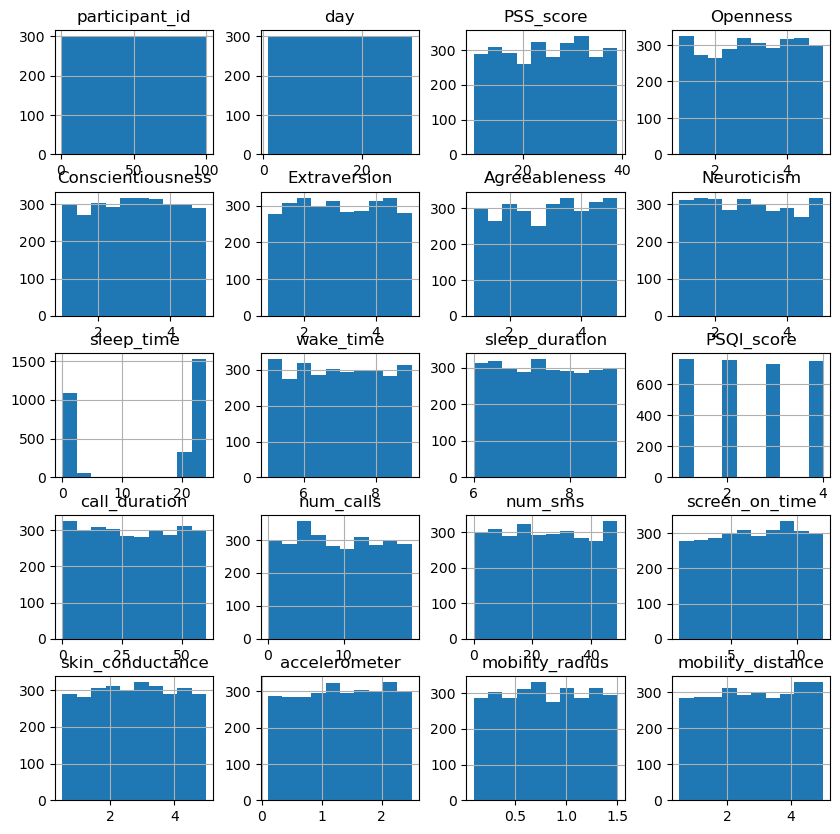

In [4]:
# Summary statistics
print(df.describe())

# Histograms of numerical columns
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10))
plt.show()

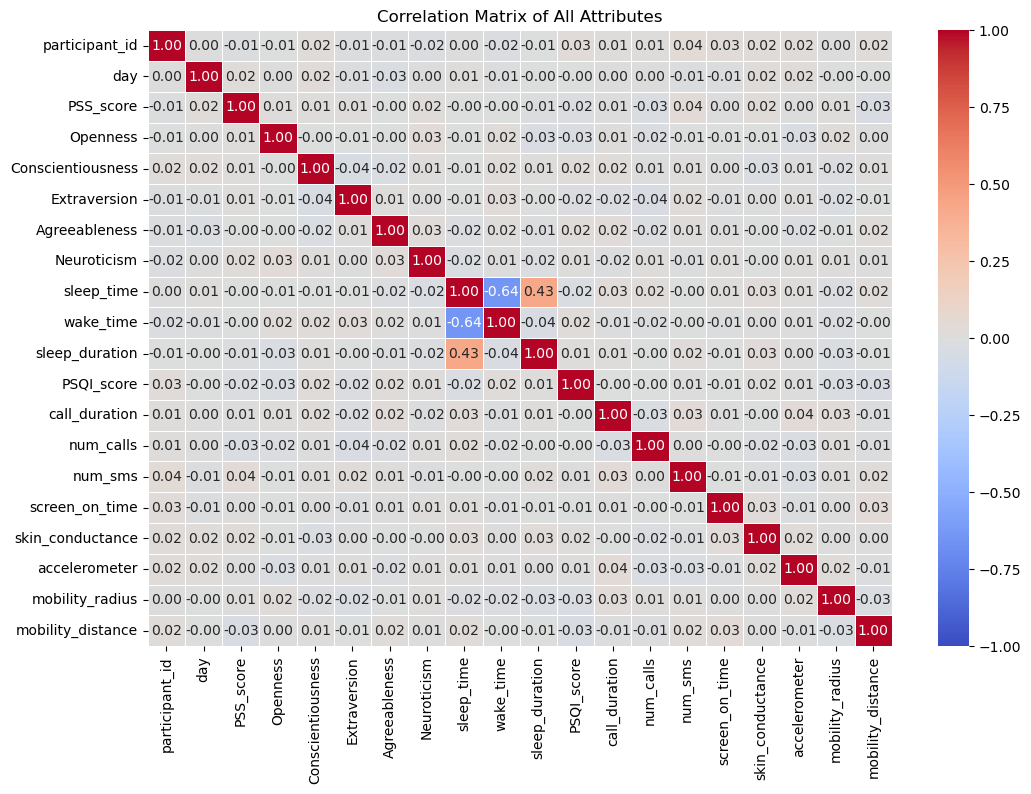

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the entire dataset
overall_corr = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.heatmap(overall_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Title and labels
plt.title('Correlation Matrix of All Attributes')
plt.show()

In [6]:
# Analysing data between participants => finding the outliers
#1. canculate mean and standart deviation for each atrribute of each participant


# Create an empty list to store the statistics for each participant
participant_stats = []

# Iterate through each participant (assuming participant_id ranges from 1 to 100)
for participant in range(1, 101):
    # Get data for the current participant
    participant_data = df[df['participant_id'] == participant]
    
    # Create a dictionary to store the mean and standard deviation for each column
    stats = {'participant_id': participant}
    
    # Iterate through each column in the participant's data (skip non-numeric columns)
    for column in participant_data.select_dtypes(include=['float64', 'int64']).columns:
        stats[f'mean_{column}'] = participant_data[column].mean()
    
    # Append the stats dictionary to the participant_stats list
    participant_stats.append(stats)

# Convert the list of dictionaries into a DataFrame
participant_stats_df = pd.DataFrame(participant_stats)
participant_stats_df = participant_stats_df.drop(columns=['mean_participant_id', 'mean_day'])
participant_stats_df

participant_id  mean_PSS_score  mean_Openness  mean_Conscientiousness  \
0                1       24.066667       2.969871                2.936993   
1                2       26.100000       2.827940                3.001828   
2                3       24.800000       3.235542                3.138758   
3                4       26.233333       3.077437                3.082911   
4                5       28.033333       3.191693                2.836798   
..             ...             ...            ...                     ...   
95              96       24.533333       3.419046                2.507409   
96              97       23.200000       3.195854                3.104051   
97              98       22.733333       2.913129                2.980791   
98              99       26.166667       2.844128                3.159861   
99             100       26.766667       3.112094                3.086468   

    mean_Extraversion  mean_Agreeableness  mean_Neuroticism  mean_sleep_time  \
0            3.122456            2.854310          2.926617        13.816318   
1            3.008937            3.081391          3.086240        13.825901   
2            3.522825            3.219264          3.155350        12.398220   
3            3.278380            3.341137          3.381396        13.013332   
4            3.235874            3.630611          2.704031        12.632829   
..                ...                 ...               ...              ...   
95           3.197089            3.253556          3.283526        11.682440   
96           3.094719            2.889947          2.647102        16.438463   
97           3.250434            2.914711          3.226234        12.707770   
98           3.129125            3.033630          3.138698        12.537538   
99           2.877808            3.203288          2.851673        12.314365   

    mean_wake_time  mean_sleep_duration  mean_PSQI_score  mean_call_duration  \
0         6.956866             7.540548         2.633333           19.760314   
1         6.810500             7.384599         2.433333           29.172357   
2         7.064615             7.466395         2.500000           28.073702   
3         6.877770             7.464438         2.566667           23.602981   
4         7.027996             7.195167         2.333333           28.302501   
..             ...                  ...              ...                 ...   
95        7.226321             7.543881         3.066667           31.762000   
96        6.631345             7.792883         2.366667           31.352529   
97        6.538818             7.431049         2.333333           29.036246   
98        7.242148             7.504610         2.366667           32.217069   
99        7.024180             7.509815         3.300000           31.523700   

    mean_num_calls  mean_num_sms  mean_screen_on_time  mean_skin_conductance  \
0         8.500000     21.933333             6.485120               2.695539   
1        11.100000     19.900000             6.131251               2.327401   
2         9.433333     25.966667             6.958746               2.748044   
3        10.800000     25.500000             6.362512               2.675821   
4         8.333333     26.366667             6.160440               3.035382   
..             ...           ...                  ...                    ...   
95        9.133333     27.133333             5.979690               2.646084   
96       11.400000     27.633333             7.506417               2.481193   
97       11.100000     25.566667             5.967230               2.663355   
98       10.066667     21.066667             7.795772               2.812793   
99        9.300000     24.733333             6.640219               2.769872   

    mean_accelerometer  mean_mobility_radius  mean_mobility_distance  
0             1.158174              0.671508                2.549460  
1             1.439580              0.862241          

In [8]:
#2. Check for outliers by comparing different participants data
outliers = {}

# Iterate through the columns in the participant_stats DataFrame to detect outliers
for column in participant_stats_df.columns[1:]:  # Skip participant_id column
    Q1 = participant_stats_df[column].quantile(0.25)
    Q3 = participant_stats_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers[column] = participant_stats_df[(participant_stats_df[column] < lower_bound) | (participant_stats_df[column] > upper_bound)]

# Print outliers for each attribute
for column, outlier_data in outliers.items():
    print(f"\nOutliers for {column}:")
    print(outlier_data[['participant_id', column]])


Outliers for mean_PSS_score:
Empty DataFrame
Columns: [participant_id, mean_PSS_score]
Index: []

Outliers for mean_Openness:
    participant_id  mean_Openness
33              34       3.623140
35              36       2.324633

Outliers for mean_Conscientiousness:
    participant_id  mean_Conscientiousness
86              87                3.601729
93              94                3.576973

Outliers for mean_Extraversion:
Empty DataFrame
Columns: [participant_id, mean_Extraversion]
Index: []

Outliers for mean_Agreeableness:
   participant_id  mean_Agreeableness
4               5            3.630611

Outliers for mean_Neuroticism:
Empty DataFrame
Columns: [participant_id, mean_Neuroticism]
Index: []

Outliers for mean_sleep_time:
Empty DataFrame
Columns: [participant_id, mean_sleep_time]
Index: []

Outliers for mean_wake_time:
    participant_id  mean_wake_time
87              88        6.410473

Outliers for mean_sleep_duration:
    participant_id  mean_sleep_duration
49           

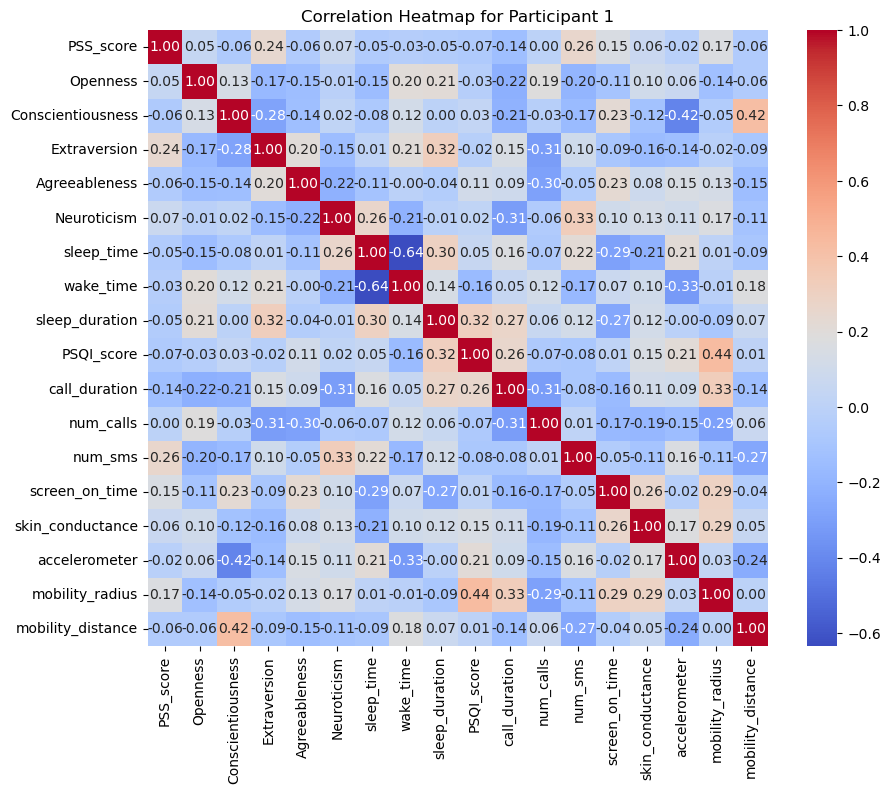

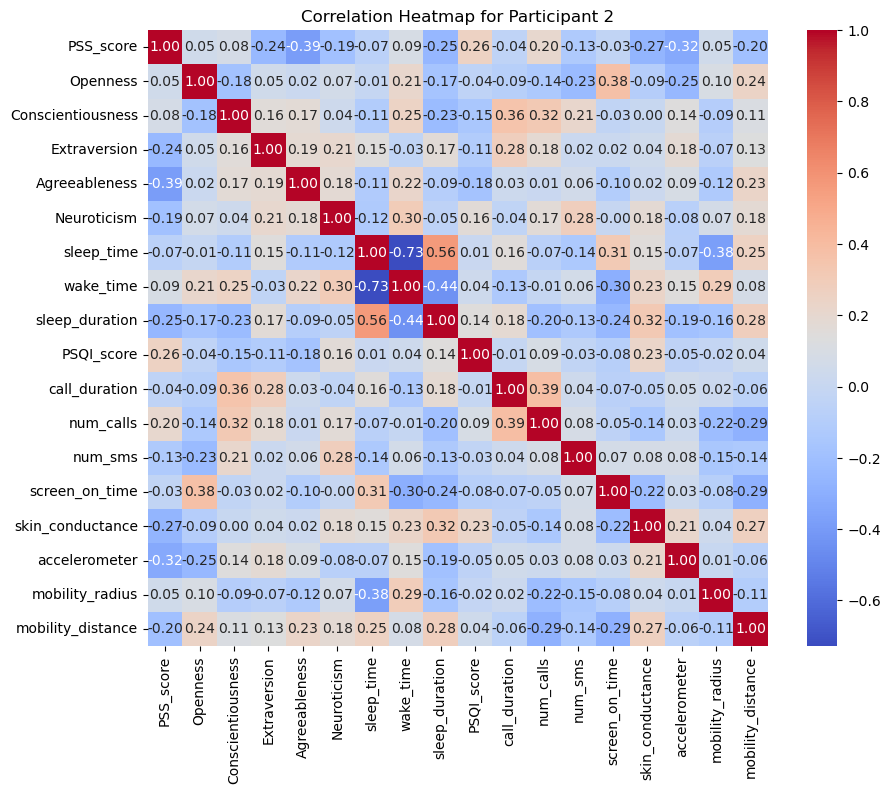

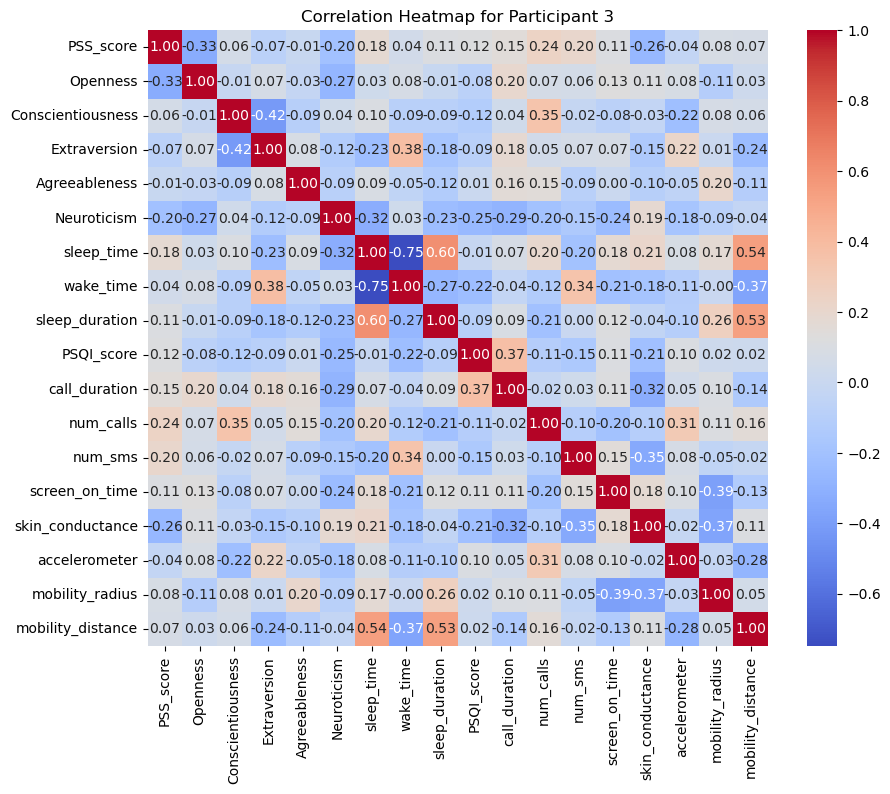

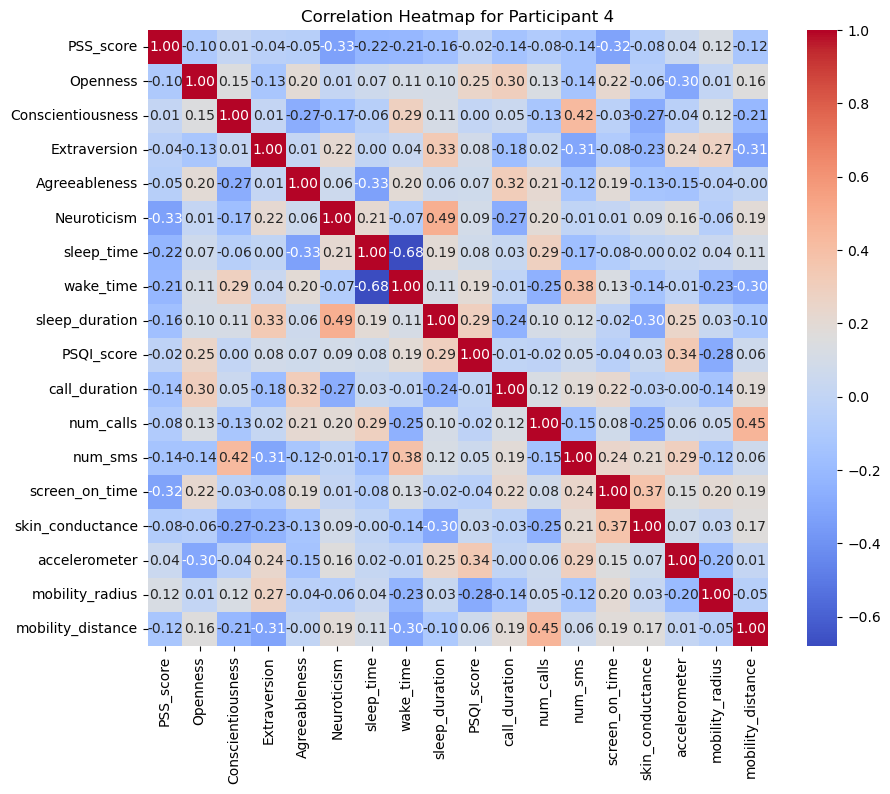

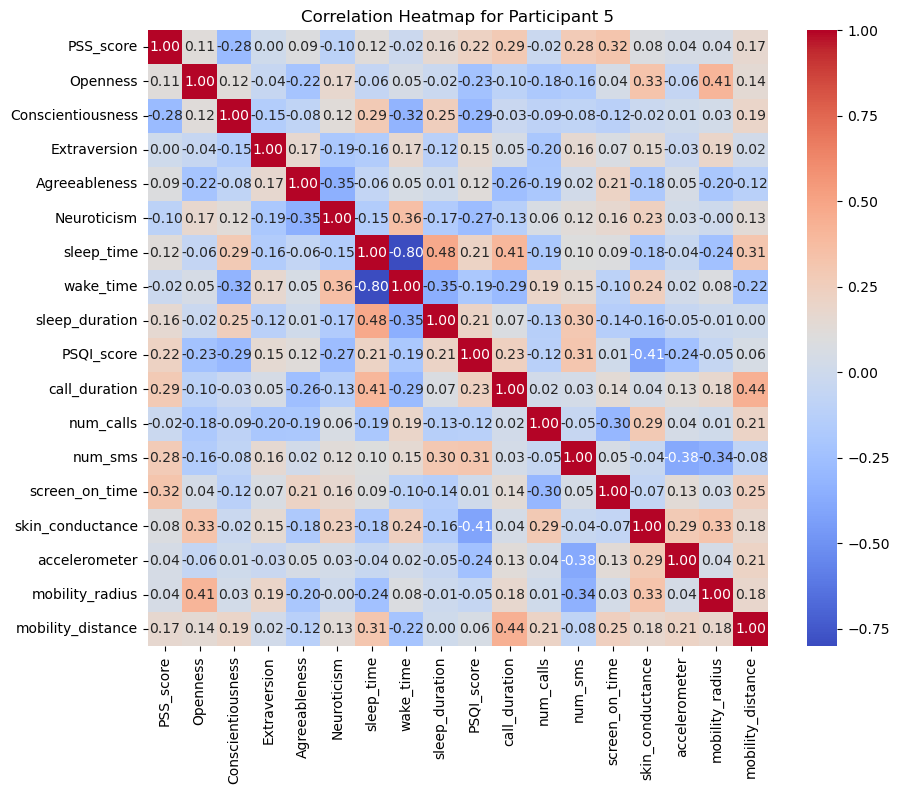

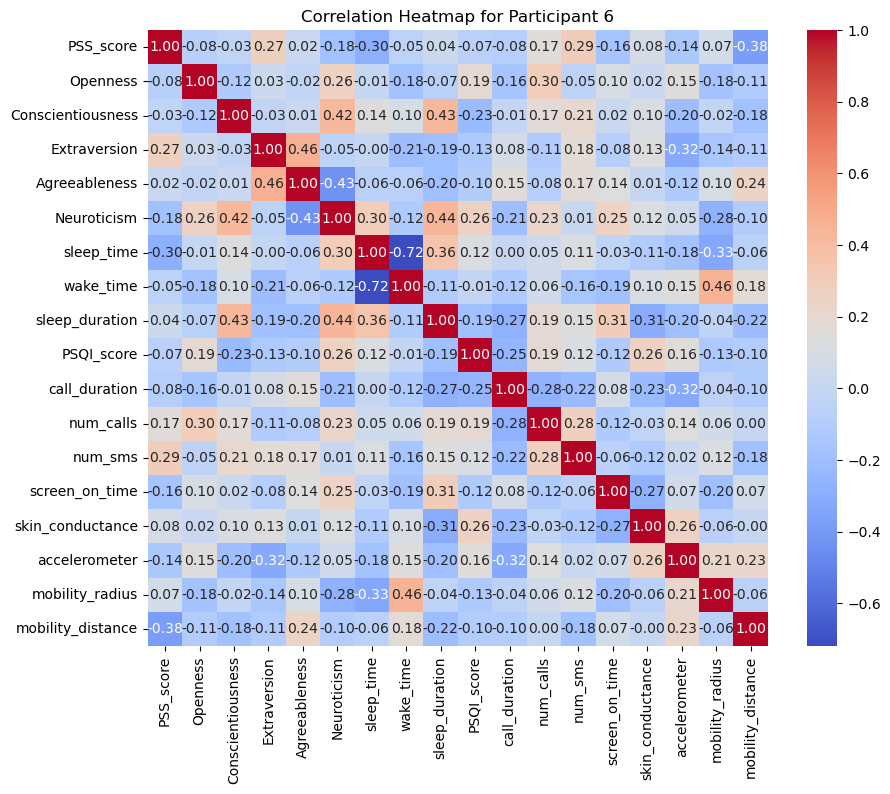

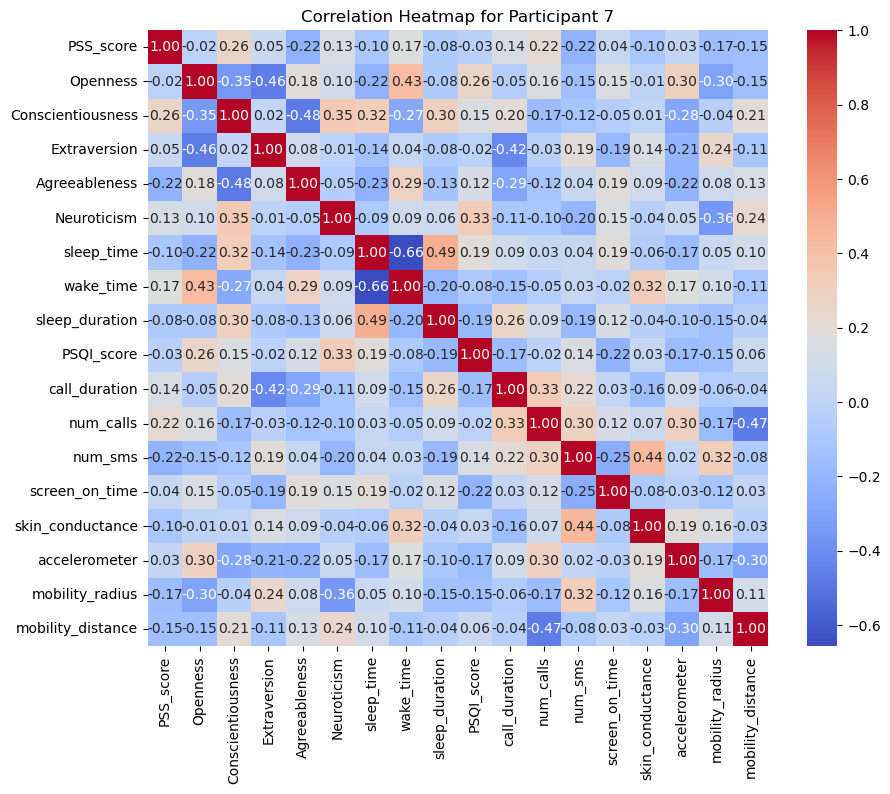

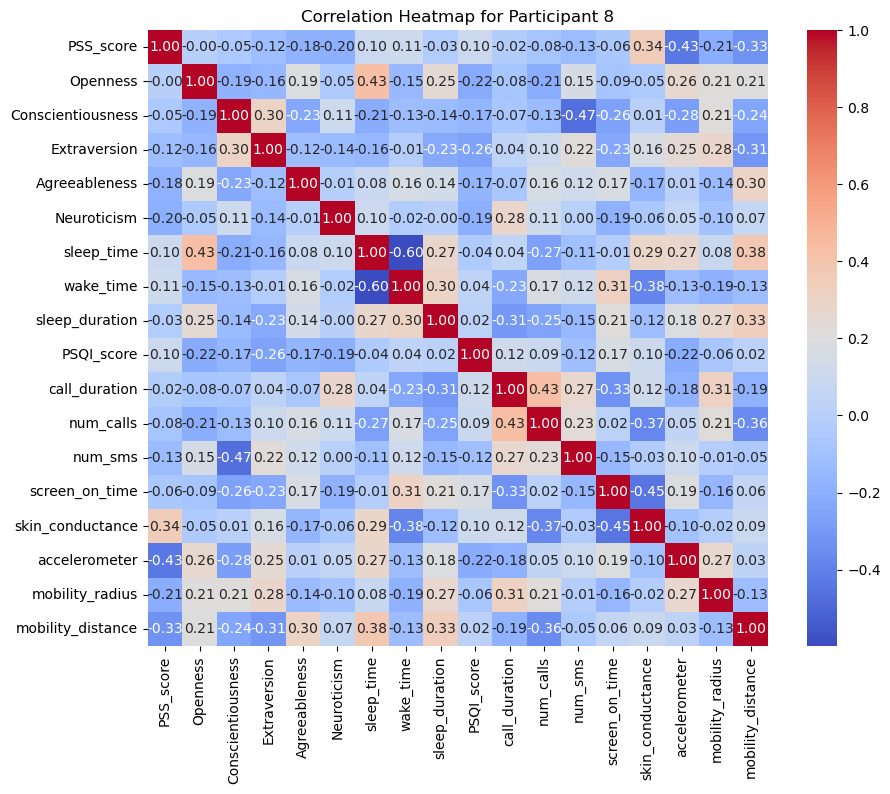

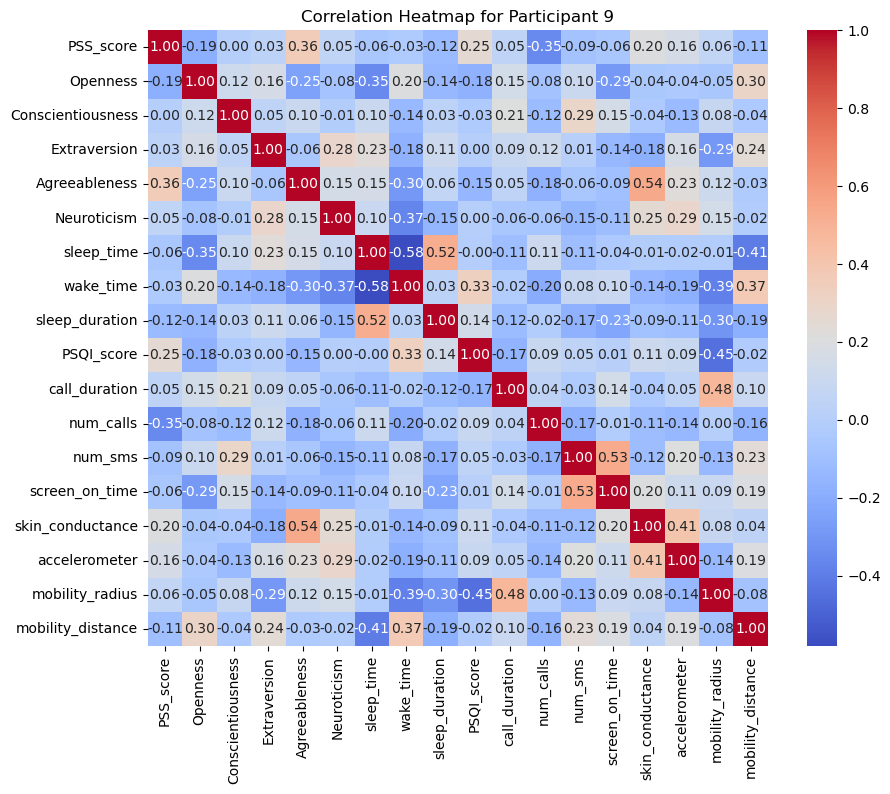

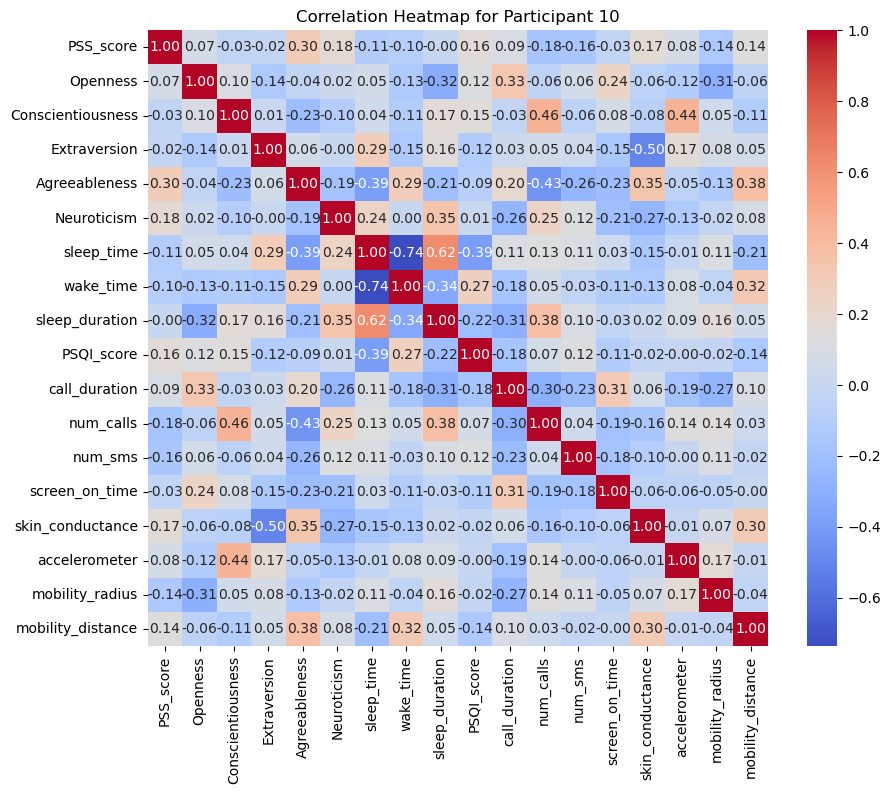

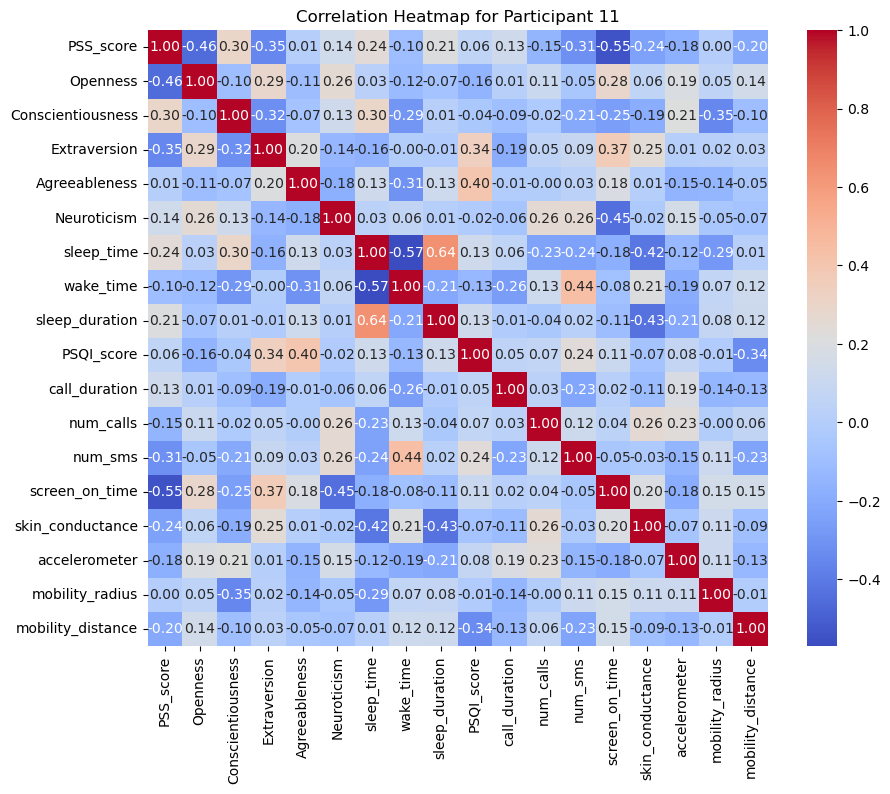

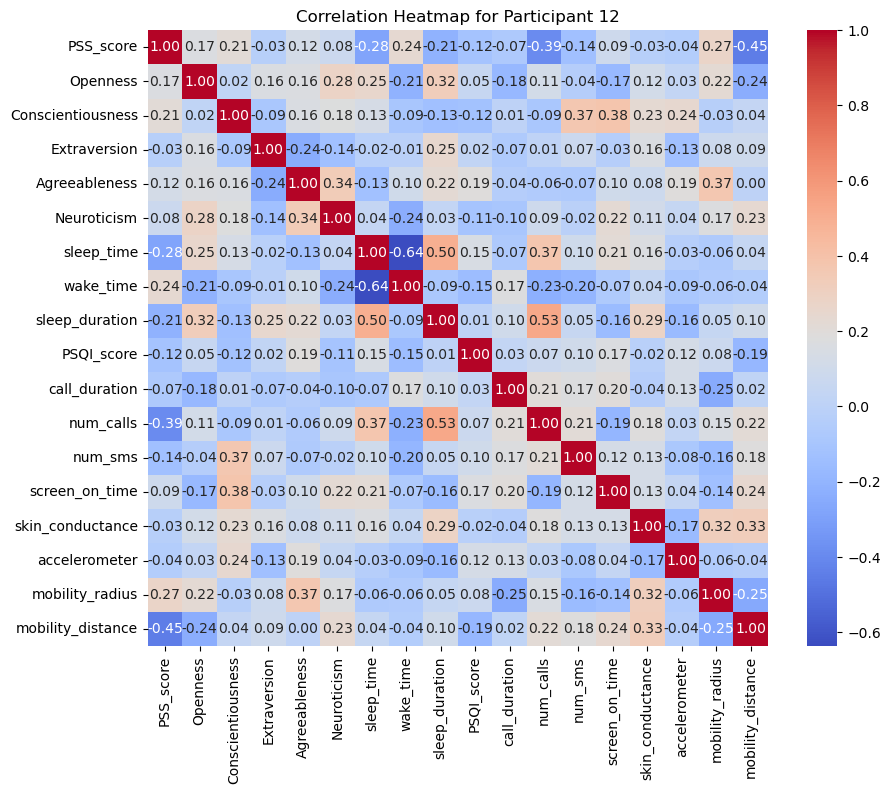

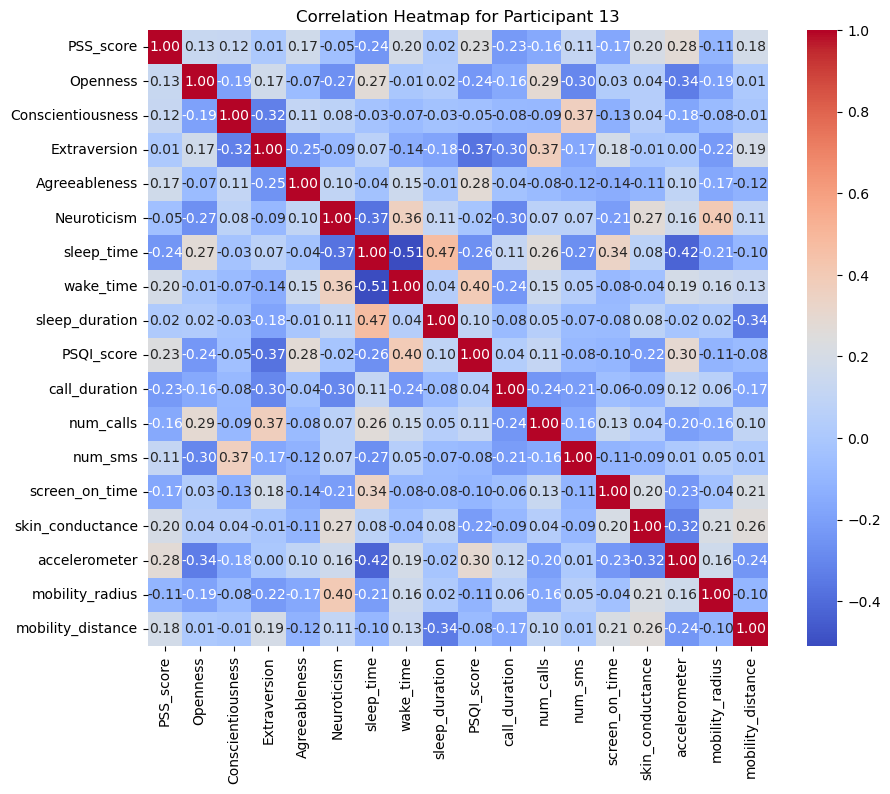

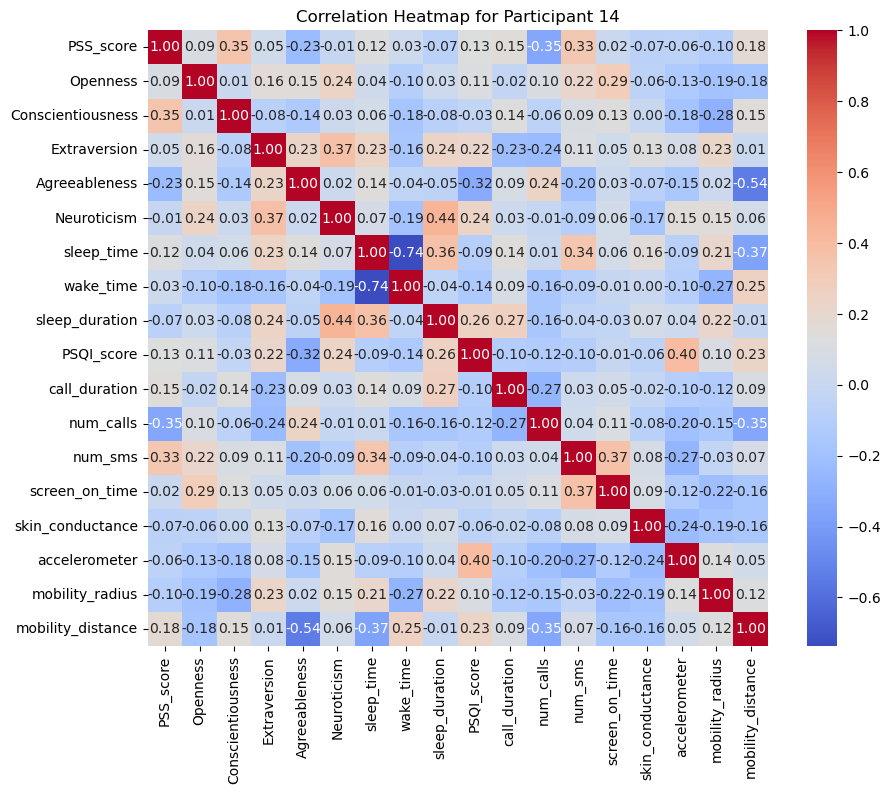

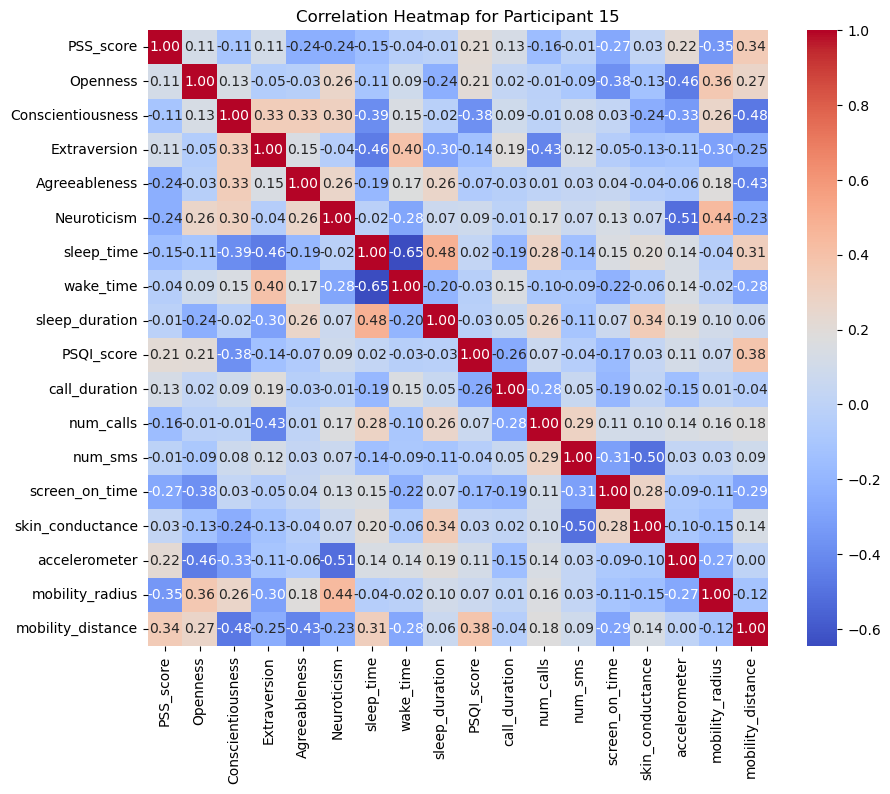

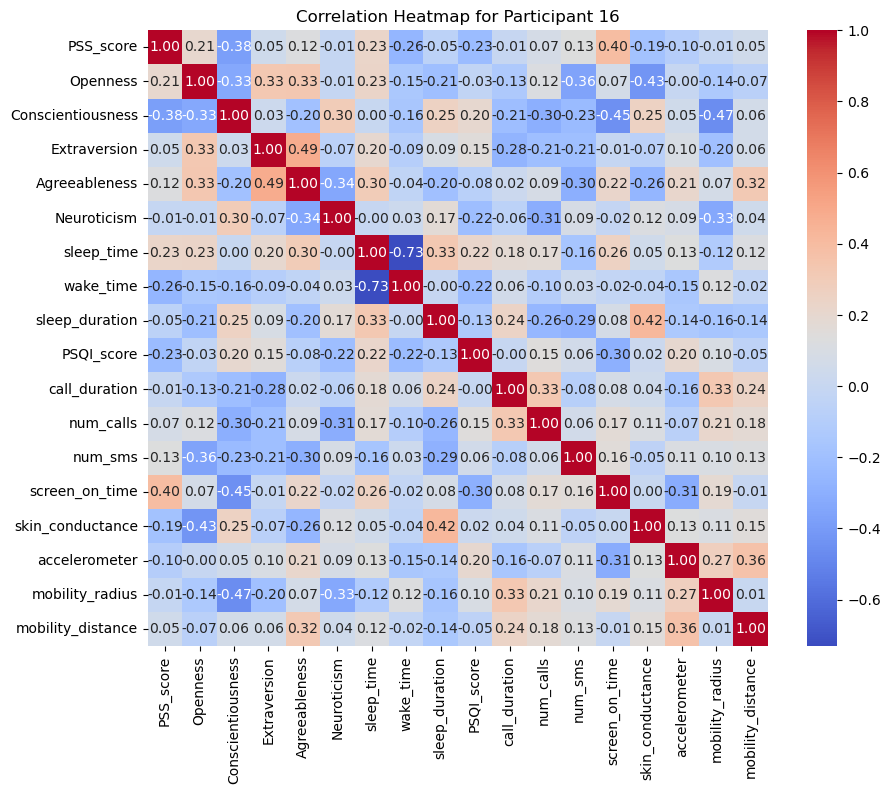

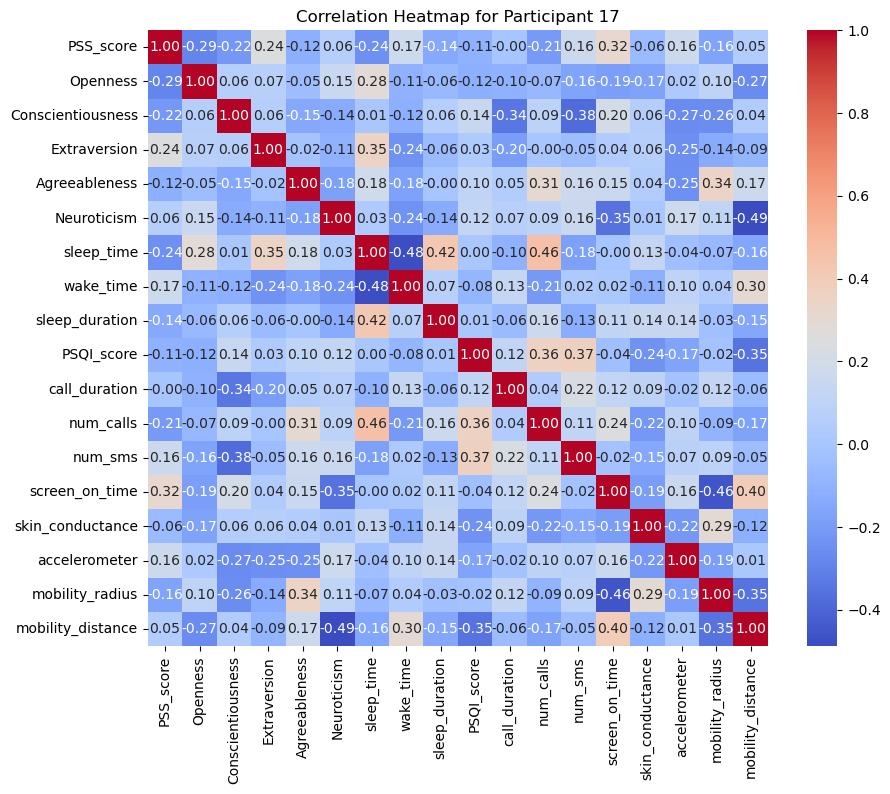

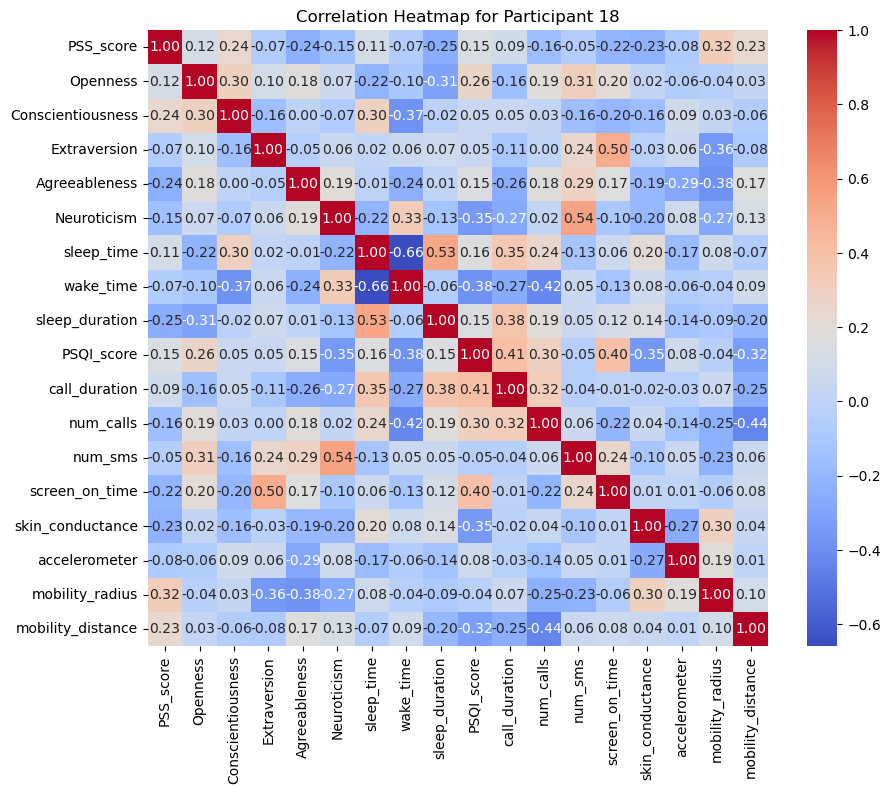

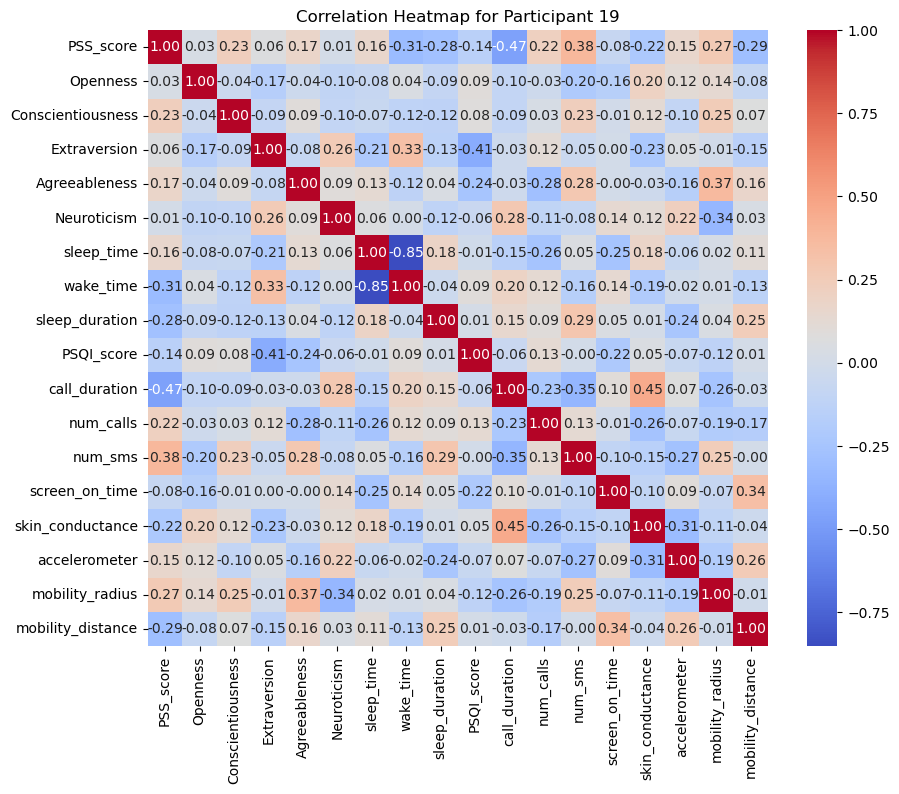

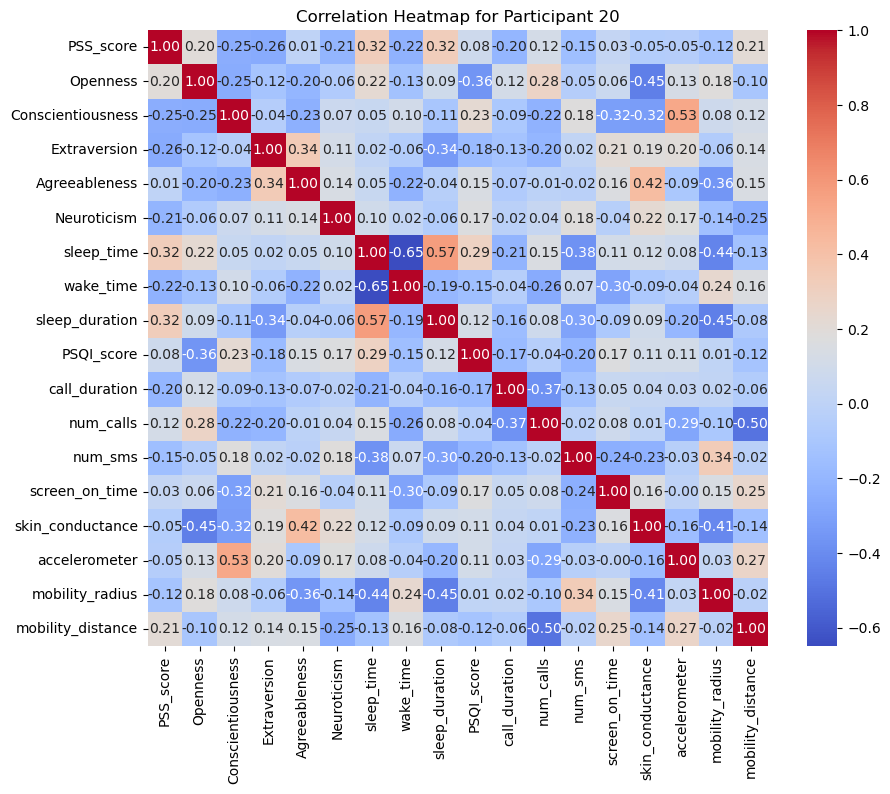

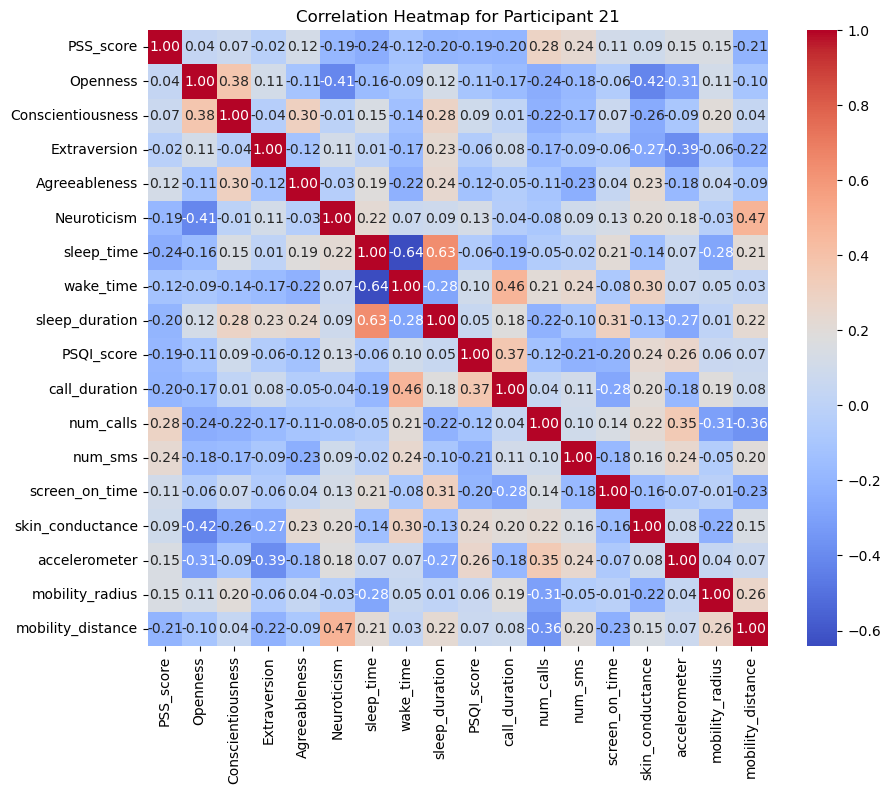

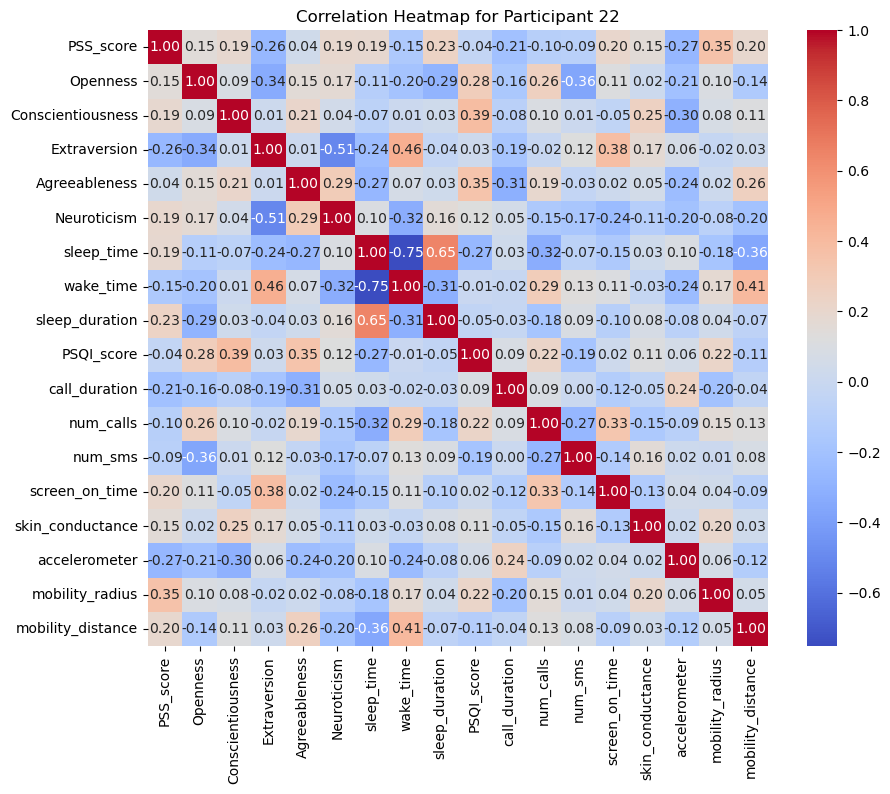

Exception ignored in: Traceback (most recent call last):
'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
  File "/Library/anaconda3/lib/python3.12/site-packages/PIL/ImageFile.py", line 536, in _save
    fh = fp.fileno()
         ^^^^^^^^^
AttributeError: '_idat' object has no attribute 'fileno'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/v2/zsp5bwws5rlgpwb6j8pf6vqr0000gn/T/ipykernel_54317/2741982244.py", line 23, in <module>
    plt.show()
  File "/Library/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py", line 527, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get a list of unique participants
participants = df['participant_id'].unique()

# Iterate through each participant
for participant in participants:
    # Filter the data for the current participant
    participant_data = df[df['participant_id'] == participant]
    
    # Drop non-numeric columns (like participant_id and day)
    participant_data_cleaned = participant_data.drop(columns=['participant_id', 'day'])
    
    # Calculate correlation matrix for this participant
    corr_matrix = participant_data_cleaned.corr()

    # Plot the heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Correlation Heatmap for Participant {participant}')
    plt.show()

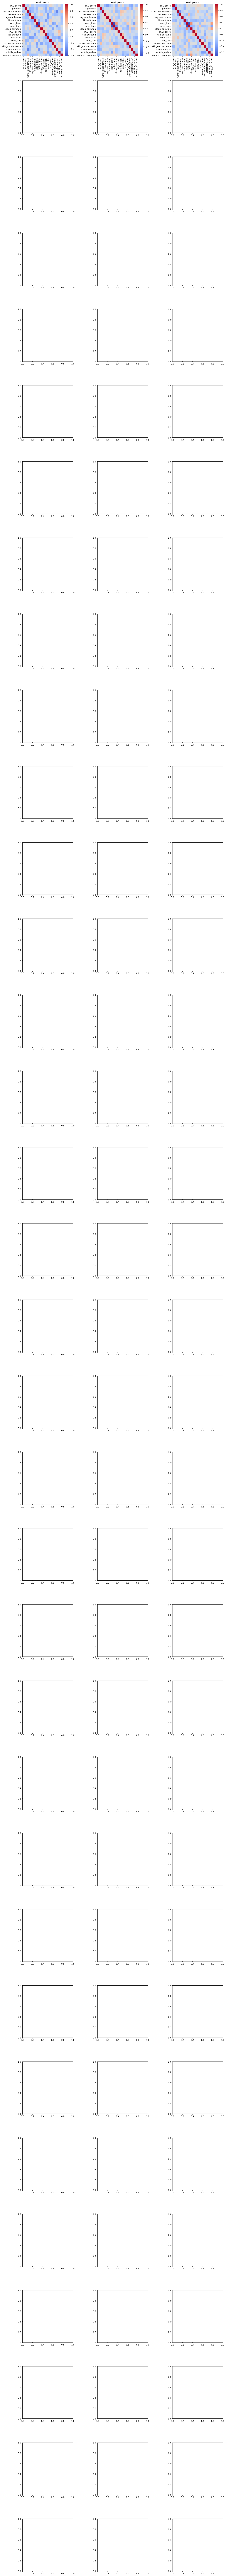

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Get a list of unique participants
participants = df['participant_id'].unique()

# Calculate the number of rows and columns for subplots
n_participants = len(participants)
n_cols = 3  # Adjust the number of columns as needed
n_rows = math.ceil(n_participants / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate through each participant
for i, participant in enumerate(participants[:3]):
    # Filter the data for the current participant
    participant_data = df[df['participant_id'] == participant]
    
    # Drop non-numeric columns (like participant_id and day)
    participant_data_cleaned = participant_data.drop(columns=['participant_id', 'day'])
    
    # Calculate correlation matrix for this participant
    corr_matrix = participant_data_cleaned.corr()
    
    # Plot the heatmap for the correlation matrix
    sns.heatmap(
        corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', 
        cbar=True, ax=axes[i]
    )
    axes[i].set_title(f'Participant {participant}', fontsize=10)


# Adjust layout
plt.tight_layout()
plt.show()

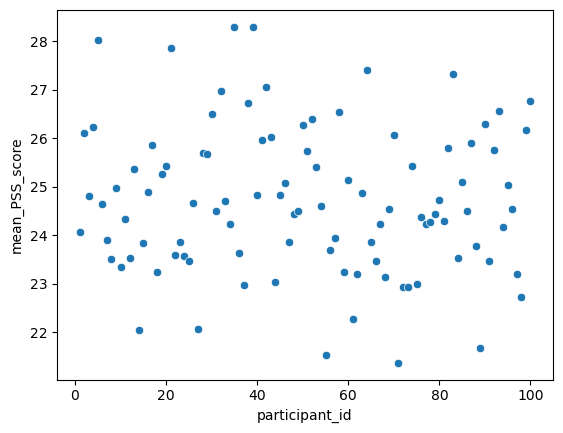

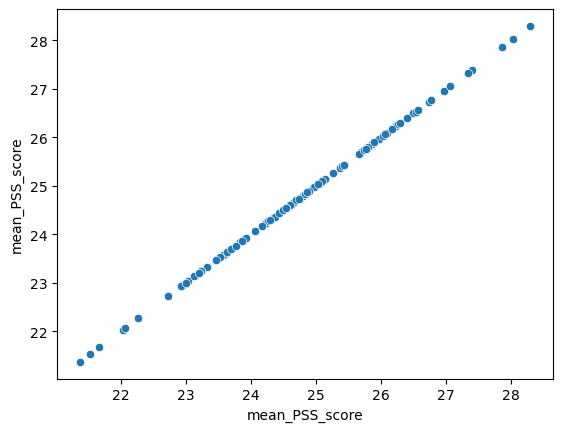

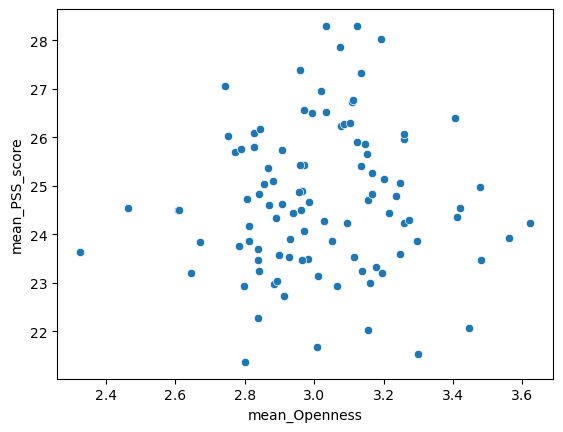

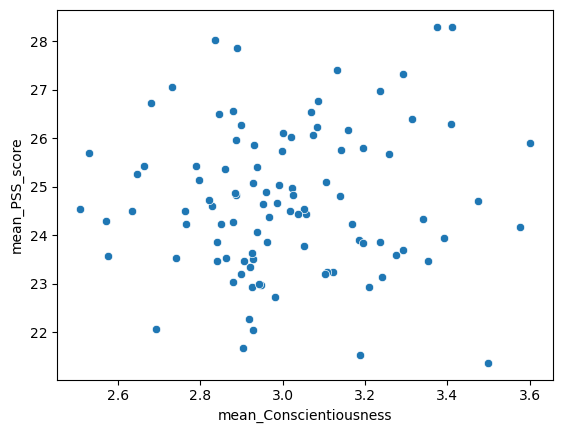

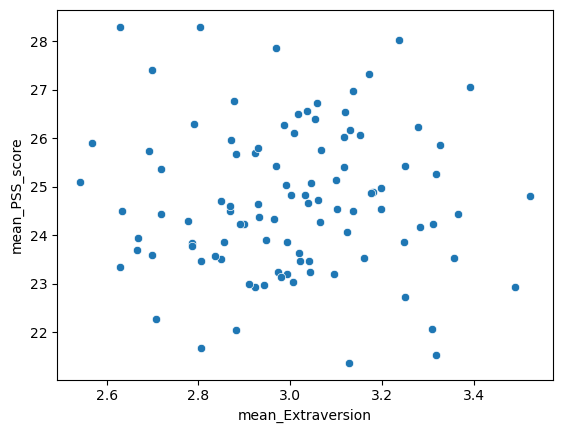

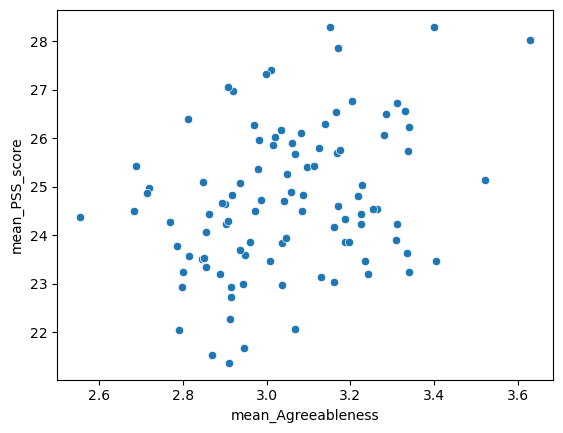

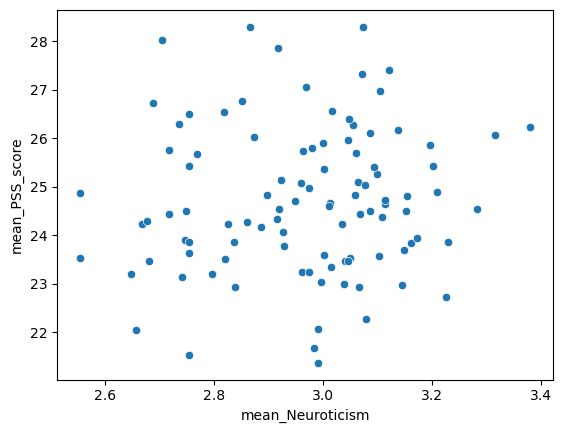

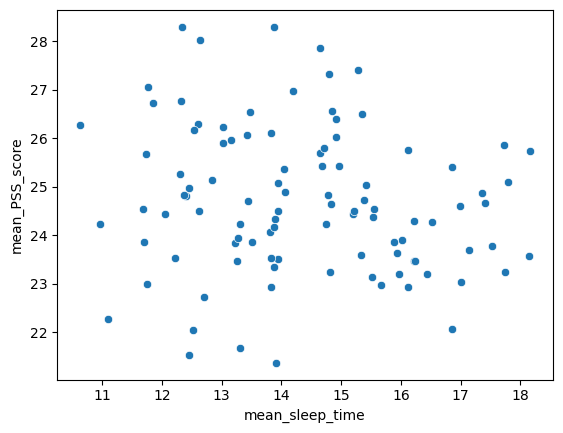

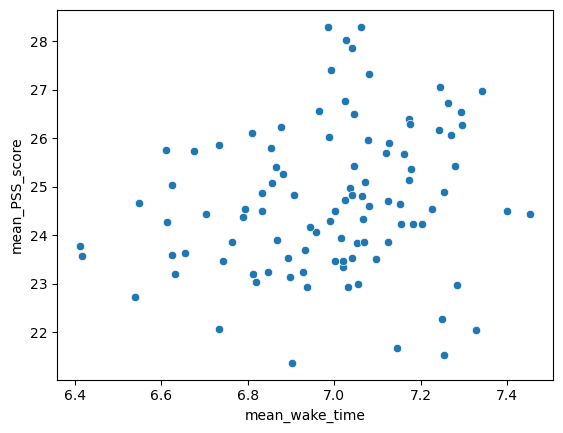

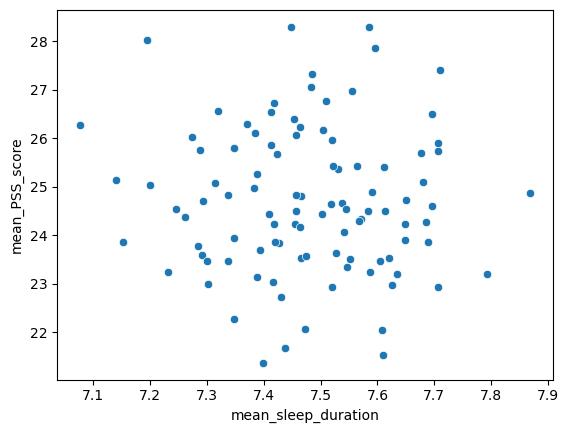

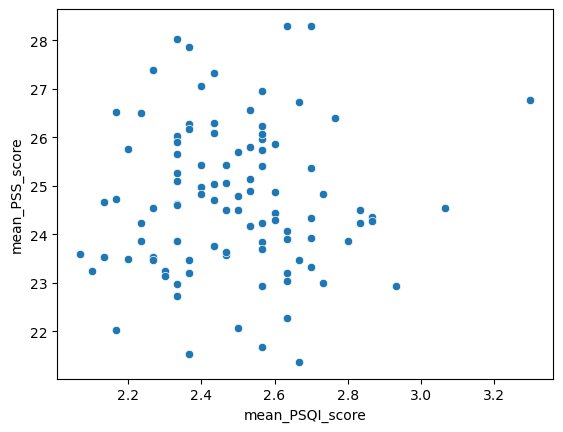

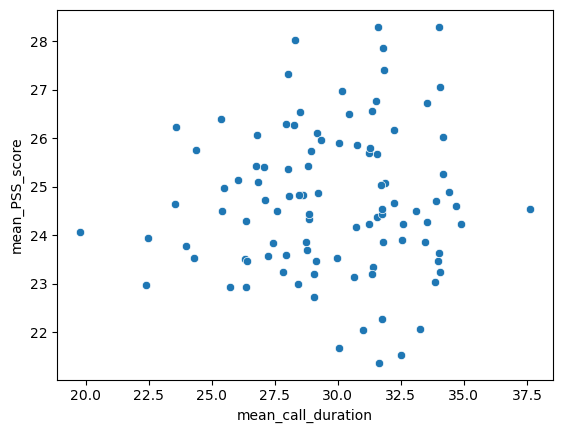

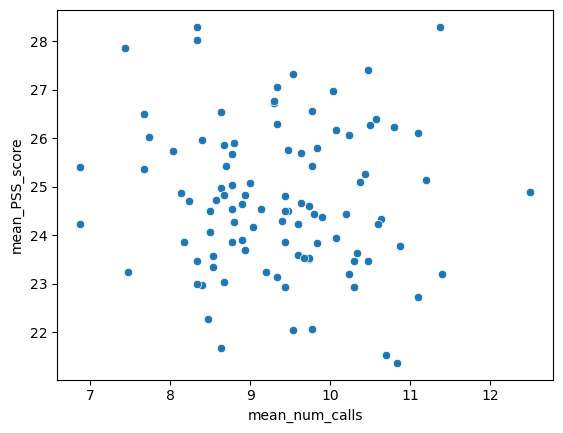

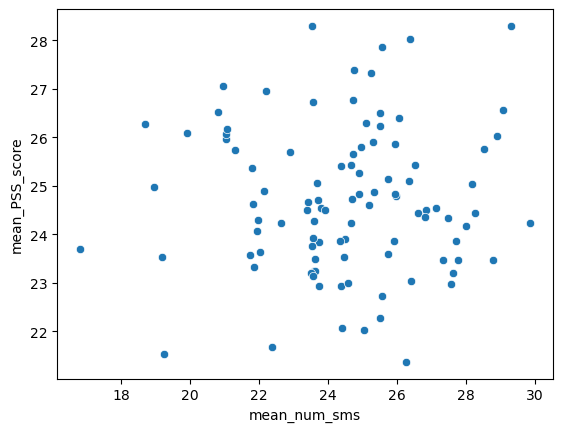

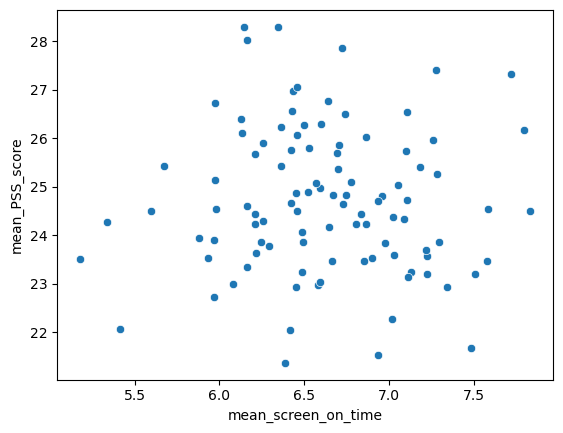

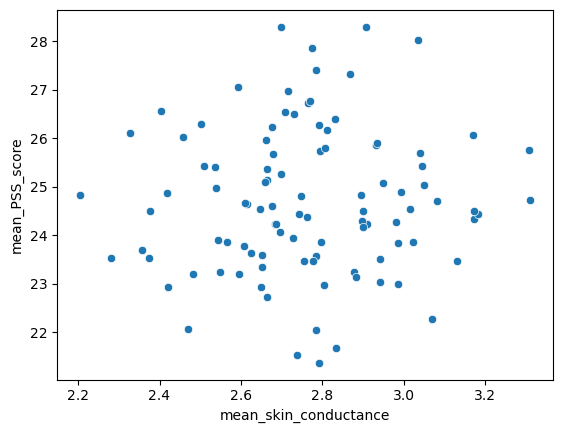

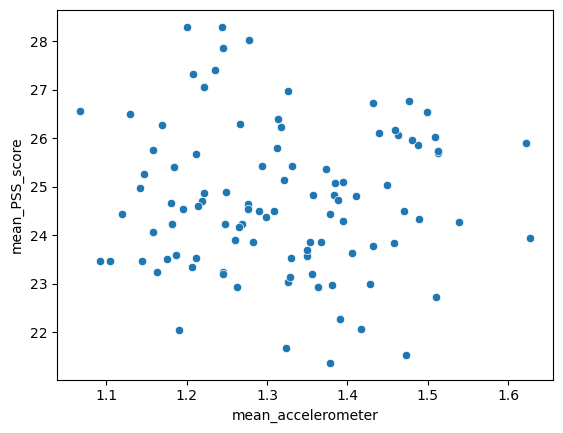

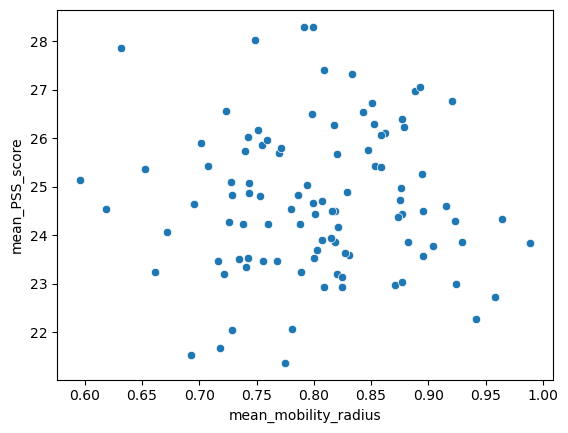

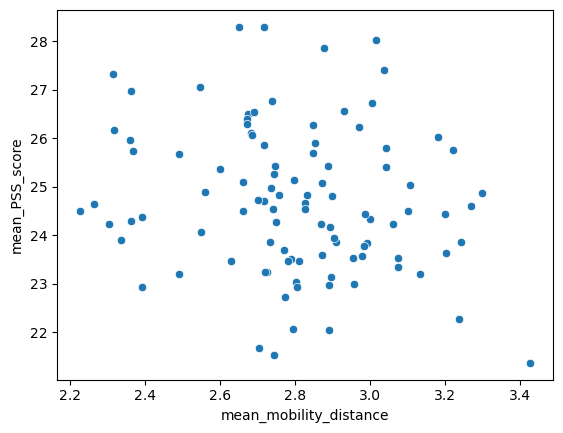

In [75]:
for column in participant_stats_df.columns:
    sns.scatterplot(x=column, y='mean_PSS_score', data=participant_stats_df)
    plt.show()

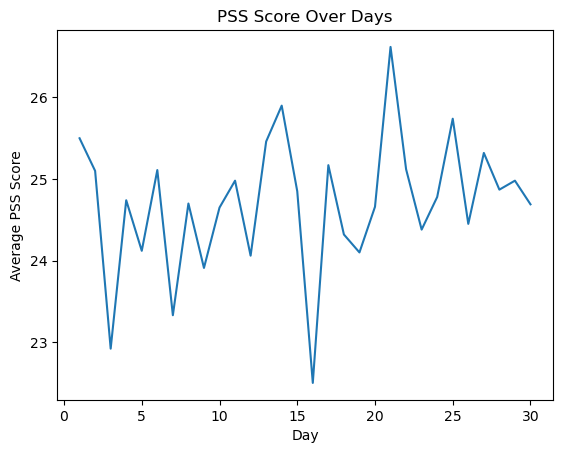

In [79]:
df.groupby('day')['PSS_score'].mean().plot()
plt.title('PSS Score Over Days')
plt.xlabel('Day')
plt.ylabel('Average PSS Score')
plt.show()